# Comparison with Observations: 
## Mean Absolute Percent Error and Normilized Forecast Metric Calculations

### Content


1. [The load of packages, modules, and data](#1-load-of-packages-modules-and-data)

2. [Calculation of the  Mean Absolute Percent Error (MAPE)](#2-calculation-of-the-mean-absolute-percent-error-mape)

3. [Calculation of Normilized Forecast Metric](#3-calculation-of-normilized-forecast-metric)

4. [Plotting Function of MAPE and NFM](#4-plotting-function-of-mape-and-nfm)

[Go to the end of file](#the-end)

#

## 1. The load of packages, modules, and data

In [1]:
import sys
from aqua import Reader
sys.path.insert(0, '../')
from tropical_rainfall_class import TR_PR_Diagnostic as TR_PR_Diag

FDB5 binary library not present on system, disabling FDB support.


In [2]:
from tropical_rainfall_func import time_interpreter

#### ICON data

In [3]:
reader = Reader(model="ICON", exp="ngc2009", source="lra-r100-monthly")
icon = reader.retrieve()

#### IFS data

In [4]:
reader = Reader(model="IFS", exp="tco2559-ng5", source="lra-r100-monthly")
ifs = reader.retrieve()
ifs = ifs.isel(time=slice(1, -1))

In [5]:
diag = TR_PR_Diag()

## 2. Calculation of the  Mean Absolute Percent Error (MAPE)

##### The Mean Absolute Percent Error (MAPE) is a metric that quantifies the average percentage difference between the predicted values and the actual values. It is calculated as the average of the absolute percentage errors for each data point.

To calculate the MAPE, follow these steps:

* Calculate the absolute error for each data point by taking the absolute difference between the predicted value and the corresponding actual value.

* Calculate the percentage error for each data point by dividing the absolute error by the actual value and multiplying by 100.

The final formula for MAPE is:
$$
MAPE = 100 * \frac{observations - dataset}{observations}
$$

##### The most important feature of the function is that before comparing the confidence interval in the datasets function :

* verifies that two datasets are in the same units and, if not, converts the units of the second dataset to the units of the first dataset.

* re-grids the time and space grid of the dataset, which has a higher time or spatial resolution. 

##### By default, the function compares provided dataset with `era5, monthly` data and returns a xarrray with the lowest spatial and time resolution between provided two. The user can decrease the resolution even more by 

* $space\_grid\_factor$: if the factor is positive and integer, the space grid frequency will be increased in  $space\_grid\_factor$ times; 
The space grid frequency will be decreased in $space\_grid\_factor$ times if the factor is negative and integer. 

* $time\_freq$: new frequency of time coordinates in the MAPE dataset (for example, "3H", "5D", "2M" etc.).

* $time\_grid\_factor$: the factor will proportionally decrease or increase the frequency of time coordinate ($freq = freq \times time\_grid\_factor$).

* $time\_length$: the new length of the time coordinate.

##### The MAPE of `icon, monthly` data in comparison with `era, monthly` data (default) is 

In [22]:
mape_icon = diag.mean_absolute_percent_error(icon, trop_lat=90)

/work/bb1153/b382267/AQUA/diagnostics/tropical-rainfall/notebooks/../tropical_rainfall_class.py:1265: RuntimeWarning: divide by zero encountered in divide
  mape.values     = 100 * (observations_regrided.values - data_regrided.values) /  observations_regrided.values


##### The mean absolute percent error (MAPE) of `ifs, monthly` data in comparison with `era, monthly` data (default) is 

In [7]:
mape_ifs = diag.mean_absolute_percent_error(ifs, trop_lat=90)

/work/bb1153/b382267/AQUA/diagnostics/tropical-rainfall/notebooks/../tropical_rainfall_class.py:1265: RuntimeWarning: divide by zero encountered in divide
  mape.values     = 100 * (observations_regrided.values - data_regrided.values) /  observations_regrided.values
/work/bb1153/b382267/AQUA/diagnostics/tropical-rainfall/notebooks/../tropical_rainfall_class.py:1265: RuntimeWarning: invalid value encountered in divide
  mape.values     = 100 * (observations_regrided.values - data_regrided.values) /  observations_regrided.values


## 3. Calculation of Normilized Forecast Metric

#### Another formula to measure forecast bias is called Normalized Forecast Metric (Singh, 2021).

##### Normilized Forecast Metric (NFM) is equal to:

$$
normilized\_forecast\_metric = \frac{dataset - observations}{dataset + observations}
$$

##### The result of this method should be between -1 (`under-forecast`) and 1, (`over-forecast`), with 0 indicating of no bias.

##### The NFS of `icon, monthly` data in comparison with `era, monthly` data (default) is 

In [8]:
nfm_icon = diag.normilized_forecast_metric(icon, trop_lat=90)

##### The NFS of `ifs, monthly` data in comparison with `era, monthly` data (default) is 

In [9]:
nfm_ifs = diag.normilized_forecast_metric(ifs, trop_lat=90)

/work/bb1153/b382267/AQUA/diagnostics/tropical-rainfall/notebooks/../tropical_rainfall_class.py:1236: RuntimeWarning: invalid value encountered in divide
  nfm.values      = (data_regrided.values - dummy_data_regrided.values) /  (data_regrided.values + dummy_data_regrided.values)


##### The NFS of `ifs, monthly` data in comparison with `mswep, monthly` data is 

In [23]:
nfm_ifs_mswep = diag.normilized_forecast_metric(ifs, model='mswep', trop_lat=90)

## 4. Plotting Function of MAPE and NFM

##### The plot of MAPE of `ifs, monthly` data in comparison with `era, monthly` data

{<GeoAxes: xlabel='Longitude', ylabel='Latitude'>,
 <Figure size 800x500 with 2 Axes>}

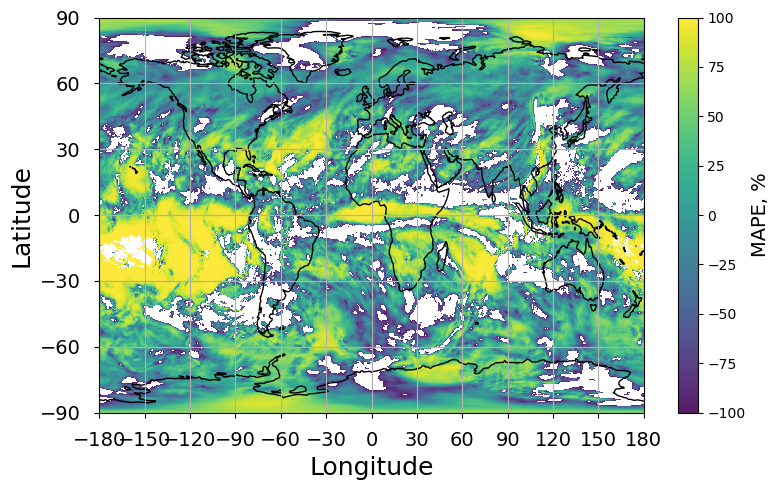

In [10]:
diag.snapshot_plot(mape_ifs, trop_lat=90, vmin=-100, vmax=100,  colorbarname="MAPE, %")

##### The plot of MAPE of `icon, monthly` data in comparison with `era, monthly` data

{<GeoAxes: xlabel='Longitude', ylabel='Latitude'>,
 <Figure size 800x500 with 2 Axes>}

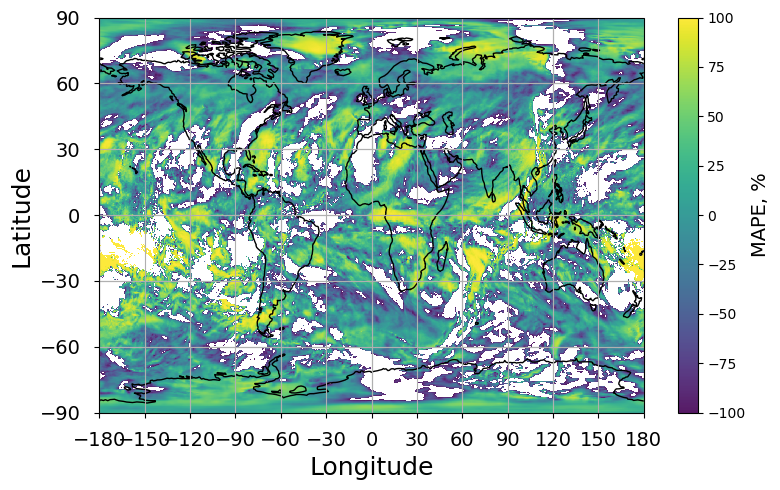

In [11]:
diag.snapshot_plot(mape_icon, trop_lat=90, vmin=-100, vmax=100,  colorbarname="MAPE, %")

##### The plot of MAPE of `icon, monthly` data in comparison with `era, monthly` data for tropocal area

{<GeoAxes: xlabel='Longitude', ylabel='Latitude'>,
 <Figure size 800x500 with 2 Axes>}

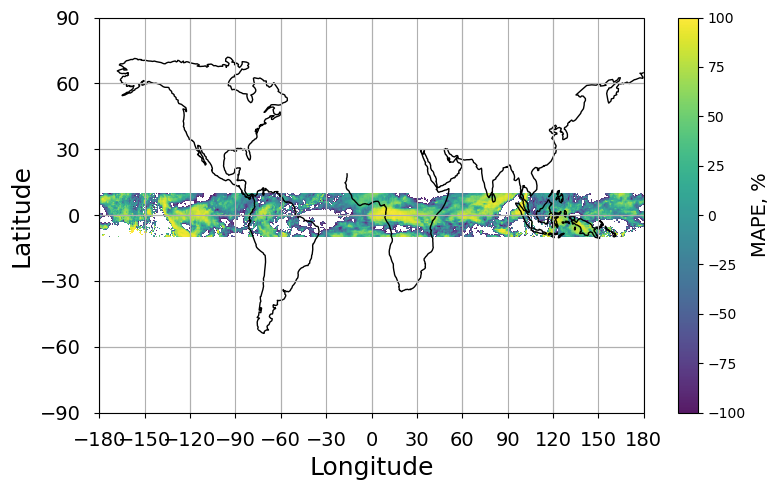

In [12]:
diag.snapshot_plot(mape_icon, trop_lat=10, vmin=-100, vmax=100,  colorbarname="MAPE, %")

##### The plot of NFM of `ifs, monthly` data in comparison with `era, monthly` data

{<GeoAxes: xlabel='Longitude', ylabel='Latitude'>,
 <Figure size 800x500 with 2 Axes>}

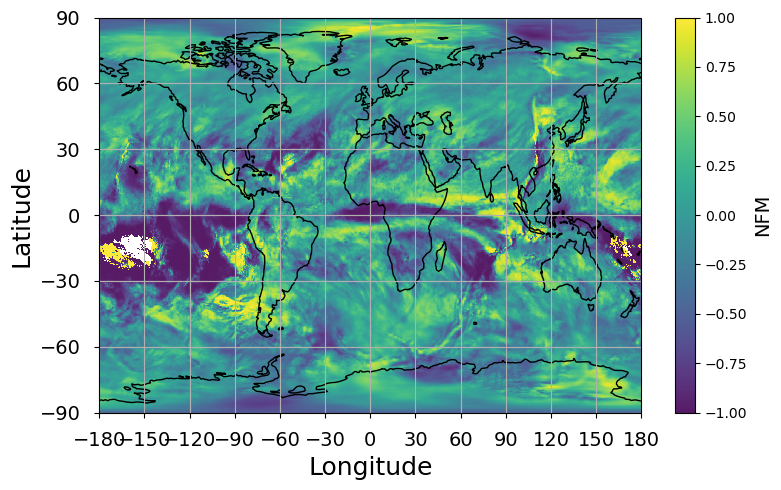

In [13]:
diag.snapshot_plot(nfm_ifs, trop_lat=90, colorbarname="NFM")

##### The plot of NFM of `ifs, monthly` data in comparison with `mswep, monthly` data

2023-07-02 22:32:22 :: create_folder :: WARNING  -> Folder ./ already exists


{<GeoAxes: xlabel='Longitude', ylabel='Latitude'>,
 <Figure size 800x500 with 2 Axes>}

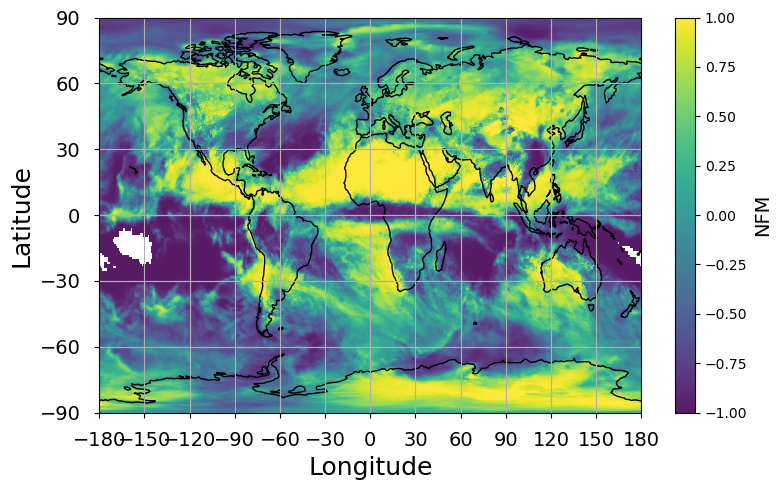

In [21]:
diag.snapshot_plot(nfm_ifs_mswep, trop_lat=90, vmin=-1, vmax=1,  colorbarname="NFM", path_to_figure="./nfm_ifs_mswep.png")

##### The plot of NFM of `icon, monthly` data in comparison with `era, monthly` data

{<GeoAxes: xlabel='Longitude', ylabel='Latitude'>,
 <Figure size 800x500 with 2 Axes>}

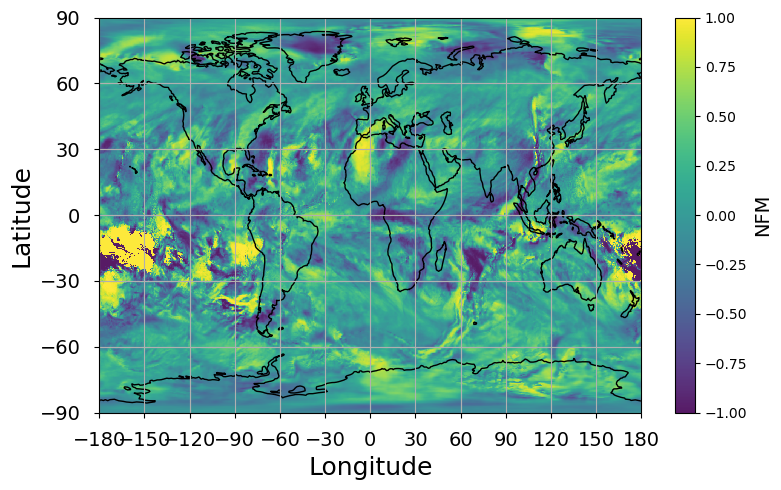

In [14]:
diag.snapshot_plot(nfm_icon, trop_lat=90, colorbarname="NFM")

##### The plot of NFM of `icon, monthly` data in comparison with `era, monthly` data for tropical area

{<GeoAxes: xlabel='Longitude', ylabel='Latitude'>,
 <Figure size 800x500 with 2 Axes>}

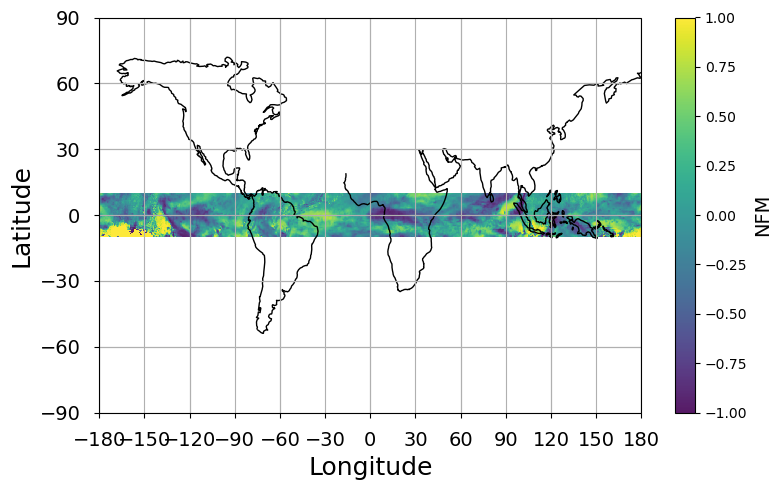

In [15]:
diag.snapshot_plot(nfm_icon, trop_lat=10, colorbarname="NFM")

#

##### The end